In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
from scipy import stats
import geopandas as gpd
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
from scipy import stats
import geopandas as gpd
%matplotlib inline

In [3]:
import uncertainties
from uncertainties import ufloat
from uncertainties import unumpy

In [4]:
Penn_2015 = pd.read_csv('PENN_CRASH_2015_Statewide.csv')
Penn_2016 = pd.read_csv('PENN_CRASH_2016_Statewide.csv')
Penn_2017 = pd.read_csv('PENN_CRASH_2017_Statewide.csv')
Penn_2018 = pd.read_csv('PENN_CRASH_2018_Statewide.csv')

C:\Users\aniha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\aniha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\aniha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,9,11,30,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
len(Penn_2017.columns)

89

In [6]:
Penn_2015 = Penn_2015.dropna(axis='columns')
Penn_2016 = Penn_2016.dropna(axis='columns')
Penn_2017 = Penn_2017.dropna(axis='columns')
Penn_2018 = Penn_2018.dropna(axis='columns')

In [7]:
len(Penn_2015.columns)

87

In [8]:
Penn_2016.head()

,CRN,DISTRICT,COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,MCYCLE_MAJ_INJ_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_MAJ_INJ_COUNT,PED_COUNT,PED_DEATH_COUNT,PED_MAJ_INJ_COUNT,MAX_SEVERITY_LEVEL,COMM_VEH_COUNT,RDWY_SURF_TYPE_CD,COUNTY_YEAR
0,2016000742,6,46,46220,68K01,2016,1,1,1558,15,...,0,0,0,0,0,0,0,0,,CRASH_2016_Montgomery
1,2016004102,6,46,46217,68K03,2016,1,7,2211,22,...,0,0,0,0,0,0,0,0,,CRASH_2016_Montgomery
2,2016004143,6,9,9207,9502,2016,1,4,1205,12,...,0,0,0,0,0,0,8,1,,CRASH_2016_Bucks
3,2016004176,6,46,46416,46416,2016,1,2,2309,23,...,0,0,0,0,0,0,8,0,,CRASH_2016_Montgomery
4,2016005228,5,45,45213,68N06,2016,1,1,52,0,...,0,0,0,0,0,0,9,0,,CRASH_2016_Monroe


In [9]:
frames = [Penn_2015, Penn_2016, Penn_2017, Penn_2018]

Penn_Aggregate = pd.concat(frames)

C:\Users\aniha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Penn_Aggregate = Penn_Aggregate.dropna(axis='columns')
Penn_Aggregate.columns

Index(['ARRIVAL_TM', 'AUTOMOBILE_COUNT', 'BELTED_DEATH_COUNT',
       'BELTED_MAJ_INJ_COUNT', 'BICYCLE_COUNT', 'BICYCLE_DEATH_COUNT',
       'BICYCLE_MAJ_INJ_COUNT', 'BUS_COUNT', 'COLLISION_TYPE',
       'COMM_VEH_COUNT', 'CONS_ZONE_SPD_LIM', 'COUNTY', 'COUNTY_NAME',
       'COUNTY_YEAR', 'CRASH_MONTH', 'CRASH_YEAR', 'CRN', 'DAY_OF_WEEK',
       'DISPATCH_TM', 'DISTRICT', 'DRIVER_COUNT_16YR', 'DRIVER_COUNT_17YR',
       'DRIVER_COUNT_18YR', 'DRIVER_COUNT_19YR', 'DRIVER_COUNT_20YR',
       'DRIVER_COUNT_50_64YR', 'DRIVER_COUNT_65_74YR', 'DRIVER_COUNT_75PLUS',
       'EST_HRS_CLOSED', 'FATAL_COUNT', 'HEAVY_TRUCK_COUNT', 'HOUR_OF_DAY',
       'ILLUMINATION', 'INJURY_COUNT', 'INTERSECT_TYPE', 'LANE_CLOSED',
       'LATITUDE', 'LN_CLOSE_DIR', 'LOCATION_TYPE', 'LONGITUDE',
       'MAJ_INJ_COUNT', 'MAX_SEVERITY_LEVEL', 'MCYCLE_DEATH_COUNT',
       'MCYCLE_MAJ_INJ_COUNT', 'MIN_INJ_COUNT', 'MOD_INJ_COUNT',
       'MOTORCYCLE_COUNT', 'MUNICIPALITY', 'MUNICIPALITY_NAME',
       'NTFY_HIWY_MAINT',

In [11]:
Penn_Aggregate['CRASH_MONTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [12]:
Penn_Aggregate.head()

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_MAJ_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_MAJ_INJ_COUNT,BUS_COUNT,COLLISION_TYPE,COMM_VEH_COUNT,...,WORK_ZONE_IND,WORK_ZONE_LOC,WORK_ZONE_TYPE,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN
0,1451,0,0,0,0,0,0,0,6,0,...,N,,,,,,,,,
1,1430,0,0,0,0,0,0,0,7,0,...,N,,,,,,,,,
2,832,0,0,0,0,0,0,0,7,0,...,N,,,,,,,,,
3,1215,1,0,0,0,0,0,0,7,0,...,N,,,,,,,,,
4,1855,1,0,0,0,0,0,0,1,0,...,N,,,,,,,,,


In [13]:
df1 = pd.crosstab(Penn_Aggregate['CRASH_YEAR'], 'count')
df1.head()

col_0,count
CRASH_YEAR,
2015,127401
2016,129395
2017,128177
2018,128411


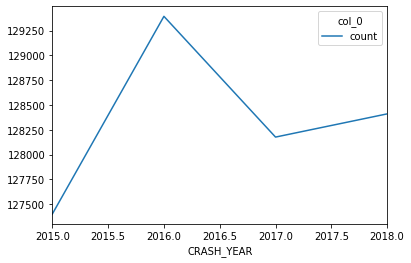

In [14]:
df1.plot()

In [15]:
Population = [12784826, 12782275, 12787641, 12800922]

In [16]:
df1['Population'] = (Population)

In [17]:
df1.head()

col_0,count,Population
CRASH_YEAR,,
2015,127401,12784826
2016,129395,12782275
2017,128177,12787641
2018,128411,12800922


In [18]:
df1=df1.reset_index()

In [19]:
df1.head()

col_0,CRASH_YEAR,count,Population
0,2015,127401,12784826
1,2016,129395,12782275
2,2017,128177,12787641
3,2018,128411,12800922


In [20]:
df1['Crashes_Normalized'] = df1['count']/df1['Population']

In [21]:
df1['log_count'] = np.log(df1['count'])
df1['log_pop'] = np.log(df1['Population'])
df1['log_Normal'] = np.log(df1['Crashes_Normalized'])
df1.head()

col_0,CRASH_YEAR,count,Population,Crashes_Normalized,log_count,log_pop,log_Normal
0,2015,127401,12784826,0.009965,11.755095,16.363770,-4.608675
1,2016,129395,12782275,0.010123,11.770625,16.363570,-4.592945
2,2017,128177,12787641,0.010024,11.761167,16.363990,-4.602822
3,2018,128411,12800922,0.010031,11.762991,16.365028,-4.602036


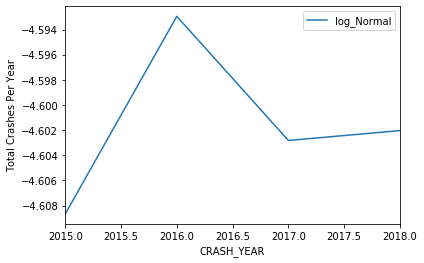

In [22]:
import matplotlib.pylab as plt
%matplotlib inline

# your code here
#Plotting the depth vs accuracy
fig, ax = plt.subplots() #get axis to plot on
df1.plot(ax=ax,x='CRASH_YEAR',y='log_Normal')#, yticks=np.arange(0, 175000, step=25000)) #show the data
plt.ylabel('Total Crashes Per Year')
plt.show()

In [23]:
arr = unumpy.uarray([1, 2], [0.01, 0.002])

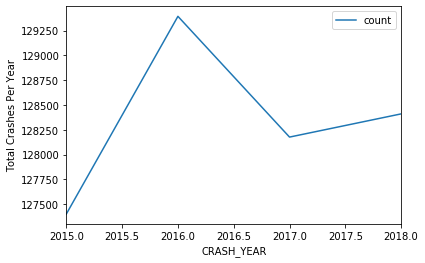

In [24]:
import matplotlib.pylab as plt
%matplotlib inline

# your code here
#Plotting the depth vs accuracy
fig, ax = plt.subplots() #get axis to plot on
df1.plot(ax=ax,x='CRASH_YEAR',y='count')#, yticks=np.arange(0, 175000, step=25000)) #show the data
plt.ylabel('Total Crashes Per Year')
plt.show()

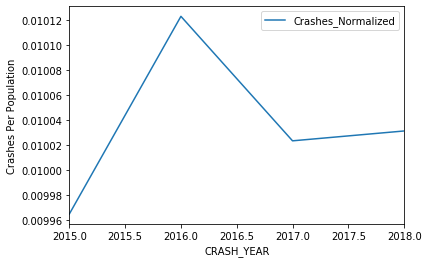

In [25]:
import matplotlib.pylab as plt
%matplotlib inline

# your code here
#Plotting the depth vs accuracy
fig, ax = plt.subplots() #get axis to plot on
df1.plot(ax=ax,x='CRASH_YEAR',y='Crashes_Normalized') #show the data
plt.ylabel('Crashes Per Population')
plt.show()

In [26]:
df3 = pd.crosstab(Penn_Aggregate['CRASH_YEAR'],Penn_Aggregate['CRASH_MONTH'])#, 'count')

#df1 = pd.crosstab(Penn_Aggregate['CRASH_YEAR'], 'count')

In [27]:
df3.head()

CRASH_MONTH,1,2,3,4,5,6,7,8,9,10,11,12
CRASH_YEAR,,,,,,,,,,,,
2015,13338,10656,10737,8581,10052,9851,9708,10068,9958,11728,11264,11460
2016,11137,10533,9107,10006,10552,10430,10288,10588,10490,11854,12001,12409
2017,11171,9062,10345,9534,10904,10596,9618,10351,10334,12250,11356,12656
2018,12500,10740,10457,8727,10478,9921,10026,10302,10225,11776,12369,10890


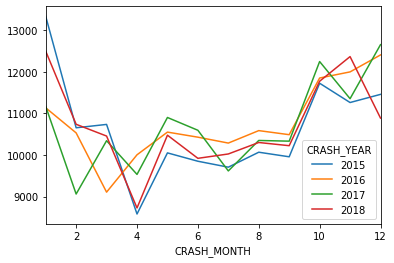

In [28]:
df3 = df3.T
df3.plot()

In [29]:
df3

CRASH_YEAR,2015,2016,2017,2018
CRASH_MONTH,,,,
1,13338,11137,11171,12500
2,10656,10533,9062,10740
3,10737,9107,10345,10457
4,8581,10006,9534,8727
5,10052,10552,10904,10478
6,9851,10430,10596,9921
7,9708,10288,9618,10026
8,10068,10588,10351,10302
9,9958,10490,10334,10225


In [39]:
years = [2015, 2016, 2017, 2018]

In [40]:
df_monthly_normal = df3
df_monthly_normal[2015] = df_monthly_normal[2015]/12784826
df_monthly_normal[2016] = df_monthly_normal[2016]/12782275
df_monthly_normal[2017] = df_monthly_normal[2017]/12787641
df_monthly_normal[2018] = df_monthly_normal[2018]/12800922
#Population = [12784826, 12782275, 12787641, 12800922]

#df4[2010] = df4[2010] / 37319502
df_monthly_normal.head()

CRASH_YEAR,2015,2016,2017,2018
CRASH_MONTH,,,,
1,0.001043,0.000871,0.000874,0.000976
2,0.000833,0.000824,0.000709,0.000839
3,0.000840,0.000712,0.000809,0.000817
4,0.000671,0.000783,0.000746,0.000682
5,0.000786,0.000826,0.000853,0.000819


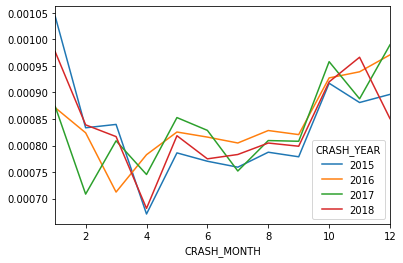

In [41]:
df_monthly_normal.plot()

In [30]:
#ILLUMINATIONa


df4 = pd.crosstab(Penn_Aggregate['CRASH_YEAR'],Penn_Aggregate['ILLUMINATION'])

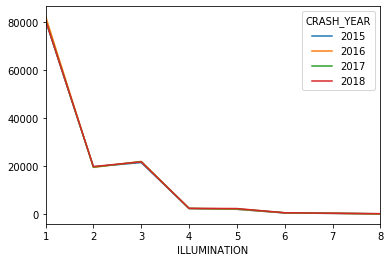

In [31]:
df4.T.plot()

In [32]:
(unumpy.nominal_values(Penn_Aggregate['ILLUMINATION'])).mean()

1.6558307232013463

In [33]:
df5 = pd.crosstab(Penn_Aggregate['CRASH_YEAR'],Penn_Aggregate['FATAL_COUNT'])
df5


FATAL_COUNT,0,1,2,3,4,5
CRASH_YEAR,,,,,,
2015,126299,1021,65,15,1,0
2016,128307,1009,63,13,1,2
2017,127096,1031,47,2,1,0
2018,127308,1027,66,9,1,0


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
df3.columns

Int64Index([2015, 2016, 2017, 2018], dtype='int64', name='CRASH_YEAR')

In [37]:
#lm = LinearRegression(fit_intercept=False).fit(REStaten_[['GROSS_SQUARE_FEET']], REStaten_['SALE_PRICE'])